<a href="https://colab.research.google.com/github/LuizFLFjr/Aprendizado-de-maquina-2/blob/main/MachineLearning_%7C%7C_finalizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from IPython import get_ipython
from IPython.display import display
# %% [markdown]
# **Tema do Trabalho:** Classificar o tipo de carga com base em características usando classificação multiclasse.
#
# **Descrição:** Este trabalho visa aplicar algoritmos de classificação multiclasse, como Random Forest e SVM, para classificar os tipos de carga (ex.: óleo diesel, etanol) com base em características como terminal, tipo de movimento e tonelagem. A análise será realizada utilizando dados existentes, sem a necessidade de dados externos, permitindo entender padrões de associação entre terminais e cargas.
#
# **Objetivo:** Desenvolver um modelo capaz de prever o tipo de carga com base nas características fornecidas, auxiliando na compreensão e análise do fluxo de cargas.
# %%
import pandas as pd

# Carregar o arquivo CSV com os dados.
# O parâmetro 'sep=';' especifica que o separador de colunas é ponto e vírgula.
# O parâmetro 'encoding='latin-1'' é usado para lidar com caracteres especiais comuns em idiomas como o português.
try:
    df = pd.read_csv('APS_DADOS_ANUAIS(2024).csv', sep=';', encoding='latin-1')
    # Exibir as primeiras linhas do DataFrame para verificar se o carregamento foi bem-sucedido.
    display(df.head())
    # Imprimir as dimensões do DataFrame (número de linhas e colunas).
    print("Dimensões do DataFrame:", df.shape)
    # Imprimir os tipos de dados de cada coluna.
    print("\nTipos de Dados das Colunas:")
    print(df.dtypes)
except FileNotFoundError:
    print("Erro: O arquivo 'APS_DADOS_ANUAIS(2024).csv' não foi encontrado. Verifique o nome do arquivo e o caminho.")
except pd.errors.ParserError:
    print("Erro: Não foi possível analisar o arquivo CSV. Verifique o separador (;) e a codificação (latin-1).")
except Exception as e:
    print(f"Ocorreu um erro inesperado ao carregar o arquivo: {e}")

,Ano,Mês,DESC_SIMPLES,TIPO_INSTALAÇÃO (grupos),Terminal - GERIN,naturezacarga,TIPO_MOVIMENTO,navegacao,Sentido_carga,desc_spa,Toneladas,TEUs,Unidades
0,2024.0,1.0,I. BARNABE OESTE,PORTO ORGANIZADO,AGEO,GRANEL LIQUIDO,CONVENCIONAL,CABOTAGEM,DESEMBARQUE,NAFTA,23.070,0.0,0.0
1,2024.0,1.0,I. BARNABE OESTE,PORTO ORGANIZADO,AGEO,GRANEL LIQUIDO,CONVENCIONAL,CABOTAGEM,DESEMBARQUE,ÓLEO DIESEL,9.898,0.0,0.0
2,2024.0,1.0,I. BARNABE OESTE,PORTO ORGANIZADO,AGEO,GRANEL LIQUIDO,CONVENCIONAL,LONGO CURSO,DESEMBARQUE,SODA CÁUSTICA,6.596,0.0,0.0
3,2024.0,1.0,I. BARNABE OESTE,PORTO ORGANIZADO,AGEO,GRANEL LIQUIDO,CONVENCIONAL,LONGO CURSO,EMBARQUE,SODA CÁUSTICA,5.963,0.0,0.0
4,2024.0,1.0,I. BARNABE OESTE,PORTO ORGANIZADO,AGEO LESTE,GRANEL LIQUIDO,CONVENCIONAL,CABOTAGEM,DESEMBARQUE,NAFTA,16.095,0.0,0.0


Dimensões do DataFrame: (16290, 13)

Tipos de Dados das Colunas:
Ano                         float64
Mês                         float64
DESC_SIMPLES                 object
TIPO_INSTALAÇÃO (grupos)     object
Terminal - GERIN             object
naturezacarga                object
TIPO_MOVIMENTO               object
navegacao                    object
Sentido_carga                object
desc_spa                     object
 Toneladas                  float64
 TEUs                       float64
 Unidades                   float64
dtype: object


Análise das Colunas Relevantes:

Coluna: Terminal - GERIN
Tipo de Dado: object
Valores Únicos: ['AGEO' 'AGEO LESTE' 'AGEO NORTE - COPAPE' 'OUTROS' 'TRANSPETRO'
 'TEQUIMAR' 'VOPAK (ALAMOA)' 'GRANEL QUIMICA (ALAMOA)' 'STOLTHAVEN'
 'NEVES & MARINHEIRO (M. PAULISTA)' 'CLI SUL (ELEVAÇÕES/RUMO)'
 'COPERSUCAR' 'HIDROVIAS DO BRASIL' 'CITROSUCO' 'FISCHER (CITROSUCO)'
 'BUNGE (SANTISTA) - MACUCO' 'NST' 'ELDORADO' 'BRACELL' 'TERMINAL XXXIX'
 'TES' 'ADM' 'BTP' 'ECOPORTO' 'CUTRALE' 'DOW' 'DPWORLD (EMBRAPORT)'
 'ADONAI' 'T-GRAO' 'SANTOS BRASIL' 'TEAG' 'TEG' 'TERMAG' 'TEV' 'TGG'
 'TIPLAM' 'USIMINAS' 'BANDEIRANTES-DEICMAR' 'LOCALFRIO' 'MARIMEX'
 'TERMARES' 'TRANSBRASA' 'TERMINAL 12A' 'SANTOS BRASIL (SSZ35.2 Saboó)'
 'trsp' 'SUZANO (ARM 32)' nan]
------------------------------

Coluna: TIPO_MOVIMENTO
Tipo de Dado: object
Valores Únicos: ['CONVENCIONAL' 'CONTRABORDO' 'REMOÇÃO' 'TRANSBORDO' 'MALOGRO' nan]
------------------------------

Coluna:  Toneladas 
Tipo de Dado: float64
Número de Valores Únicos: 

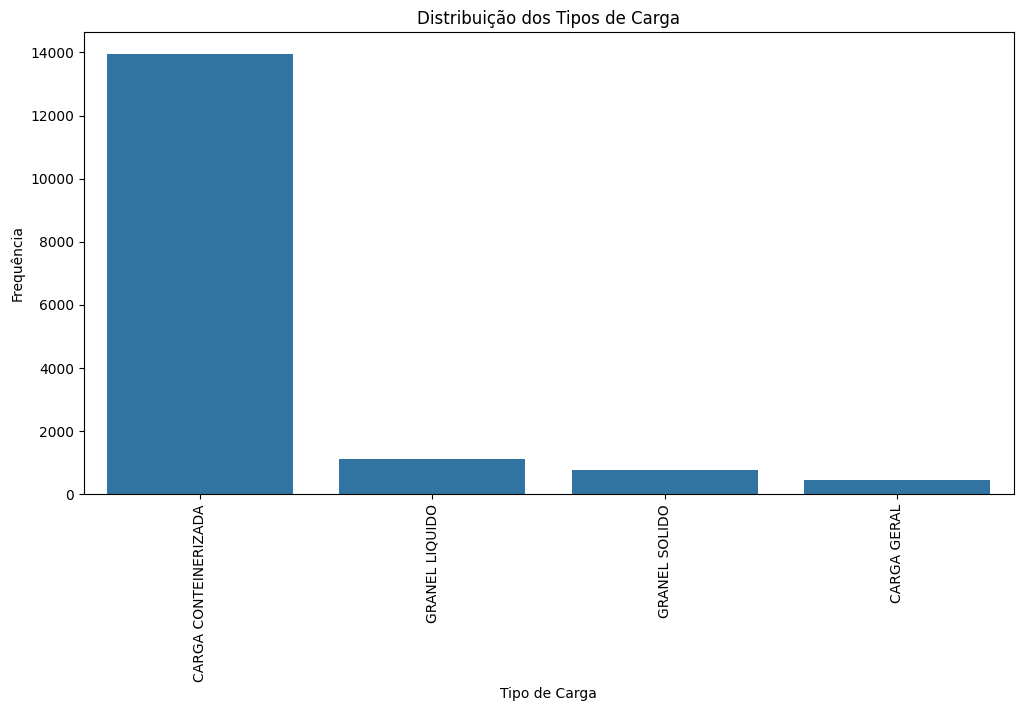

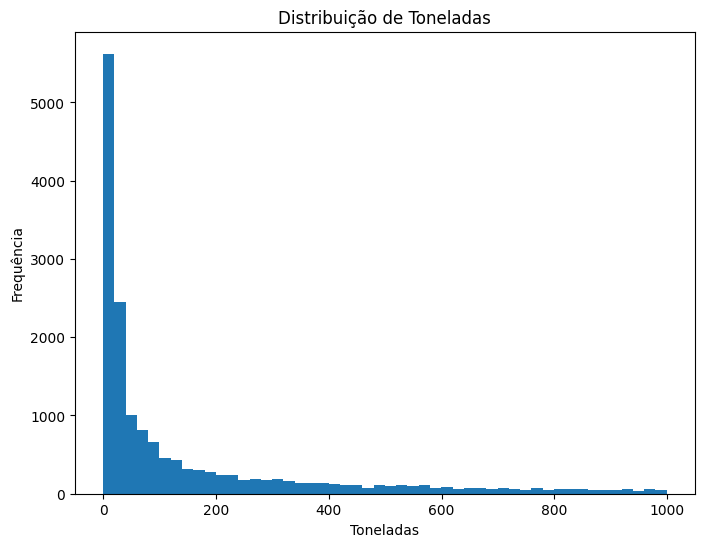

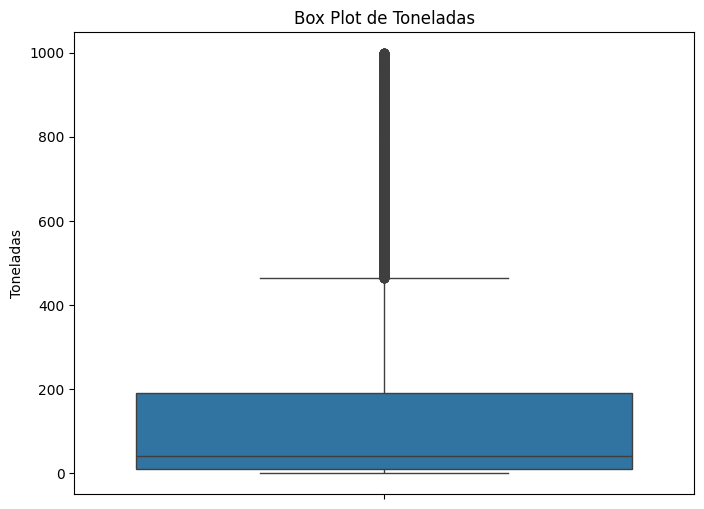


Valores Ausentes nas Colunas Relevantes:
Terminal - GERIN    18
TIPO_MOVIMENTO      18
 Toneladas          18
naturezacarga       18
dtype: int64

Porcentagem de Valores Ausentes nas Colunas Relevantes:
Terminal - GERIN    0.110497
TIPO_MOVIMENTO      0.110497
 Toneladas          0.110497
naturezacarga       0.110497
dtype: float64


In [3]:
# %%
import matplotlib.pyplot as plt
import seaborn as sns

# Identificar as colunas relevantes para a análise e o modelo.
relevant_cols = ['Terminal - GERIN', 'TIPO_MOVIMENTO', ' Toneladas ', 'naturezacarga']

# Verificar os tipos de dados e valores únicos para as colunas relevantes.
# Isso ajuda a entender a natureza dos dados e identificar possíveis problemas.
print("Análise das Colunas Relevantes:")
for col in relevant_cols:
    print(f"\nColuna: {col}")
    print(f"Tipo de Dado: {df[col].dtype}")
    # Exibir os valores únicos para colunas com até 50 valores únicos para evitar sobrecarga na saída.
    if df[col].nunique() <= 50:
        print(f"Valores Únicos: {df[col].unique()}")
    else:
        print(f"Número de Valores Únicos: {df[col].nunique()}")
    print("-" * 30)

# Análise da distribuição da variável alvo 'naturezacarga'.
# É importante entender a distribuição das classes para avaliar o balanceamento.
cargo_counts = df['naturezacarga'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=cargo_counts.index, y=cargo_counts.values)
plt.xticks(rotation=90) # Rotacionar os rótulos do eixo X para melhor visualização se forem longos.
plt.title('Distribuição dos Tipos de Carga')
plt.xlabel('Tipo de Carga')
plt.ylabel('Frequência')
plt.show()

# Análise da distribuição da variável numérica ' Toneladas '.
# Histogramas e box plots são úteis para visualizar a distribuição e identificar outliers.
plt.figure(figsize=(8, 6))
plt.hist(df[' Toneladas '], bins=50) # Usar 50 bins para uma visualização mais detalhada.
plt.title('Distribuição de Toneladas')
plt.xlabel('Toneladas')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=df[' Toneladas '])
plt.title('Box Plot de Toneladas')
plt.ylabel('Toneladas')
plt.show()

# Verificar a quantidade de valores ausentes (NaN) nas colunas relevantes.
missing_values = df[relevant_cols].isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print(f"\nValores Ausentes nas Colunas Relevantes:\n{missing_values}")
print(f"\nPorcentagem de Valores Ausentes nas Colunas Relevantes:\n{missing_percentage}")

# Visualização opcional de dados ausentes (pode ser adicionada se necessário)
# plt.figure(figsize=(8, 6))
# sns.heatmap(df[relevant_cols].isnull(), cbar=False)
# plt.title('Mapa de Calor de Valores Ausentes')
# plt.show()

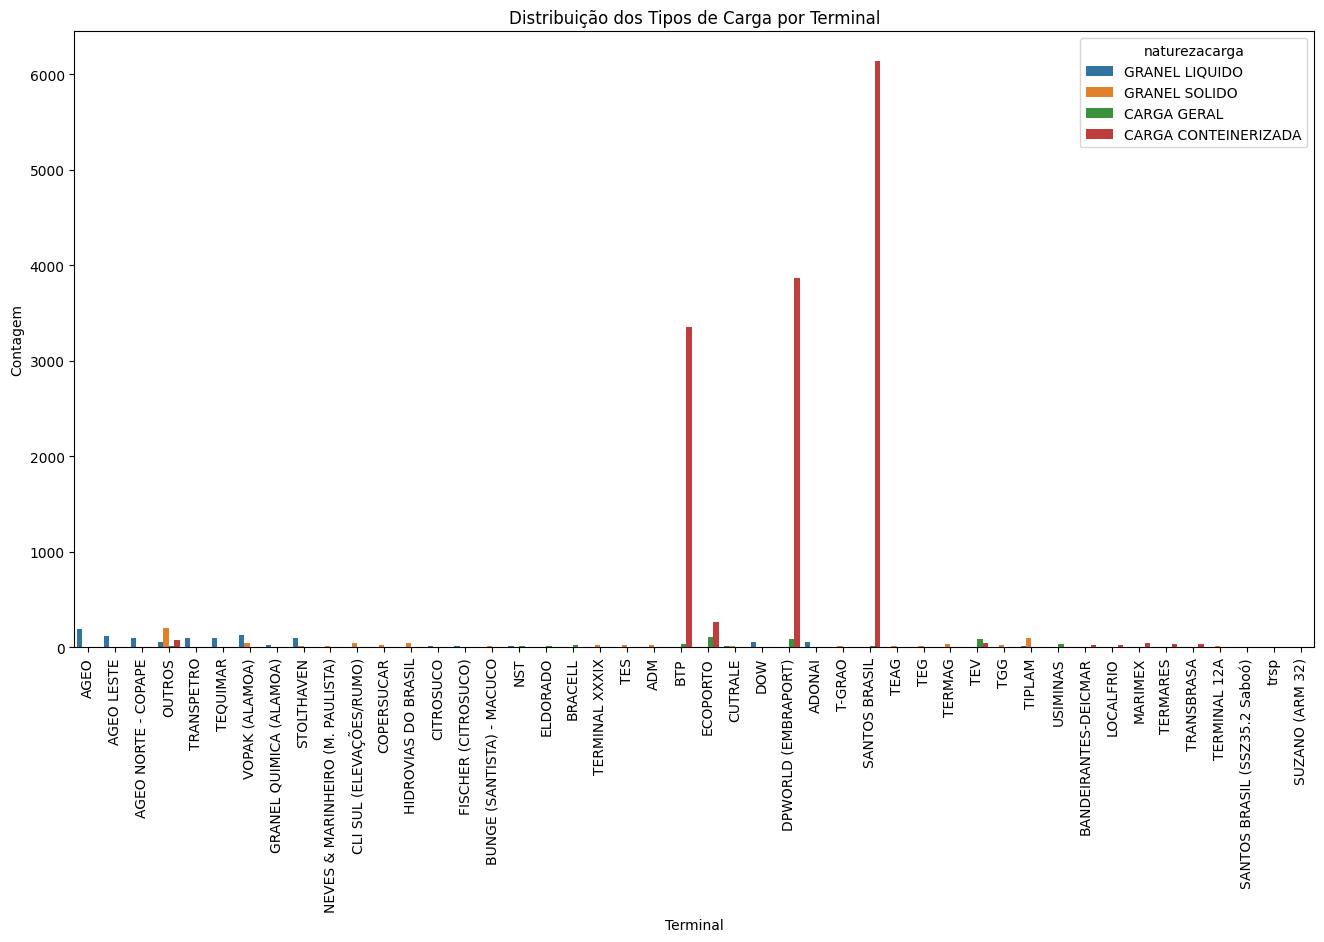

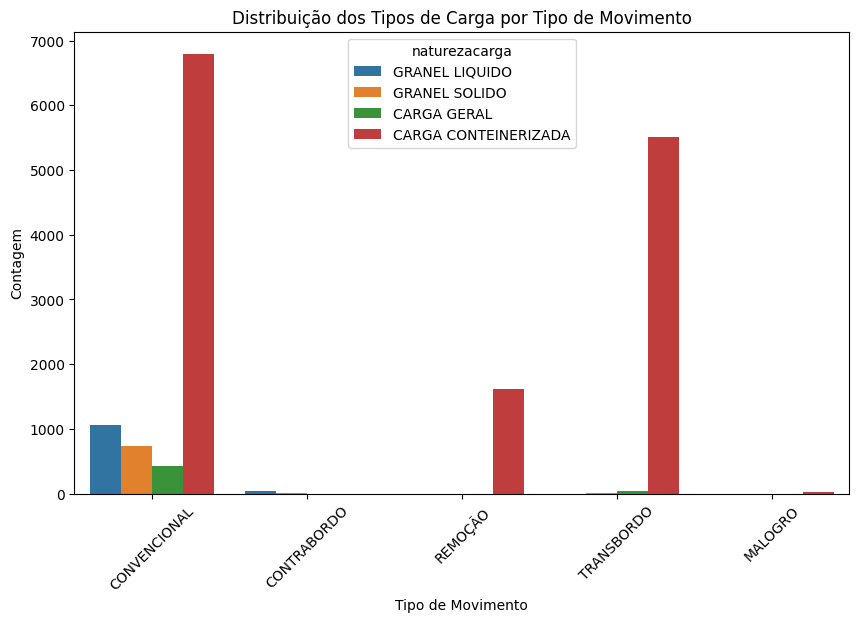

In [4]:
# %%
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras agrupado para mostrar a relação entre 'naturezacarga' e 'Terminal - GERIN'.
# Isso ajuda a visualizar quais tipos de carga são mais frequentes em cada terminal.
plt.figure(figsize=(16, 8)) # Ajustar o tamanho da figura para melhor visualização.
sns.countplot(x='Terminal - GERIN', hue='naturezacarga', data=df)
plt.xticks(rotation=90) # Rotacionar os rótulos do eixo X.
plt.title('Distribuição dos Tipos de Carga por Terminal')
plt.xlabel('Terminal')
plt.ylabel('Contagem')
plt.show()

# Gráfico de barras agrupado para mostrar a relação entre 'naturezacarga' e 'TIPO_MOVIMENTO'.
# Isso ajuda a visualizar a distribuição dos tipos de carga para cada tipo de movimento (embarque/descarga).
plt.figure(figsize=(10, 6))
sns.countplot(x='TIPO_MOVIMENTO', hue='naturezacarga', data=df)
plt.xticks(rotation=45) # Rotacionar os rótulos do eixo X.
plt.title('Distribuição dos Tipos de Carga por Tipo de Movimento')
plt.xlabel('Tipo de Movimento')
plt.ylabel('Contagem')
plt.show()

In [5]:
# %%
# Calcular a porcentagem de valores ausentes para as colunas relevantes novamente (após AED).
relevant_cols = ['Terminal - GERIN', 'TIPO_MOVIMENTO', ' Toneladas ', 'naturezacarga']
missing_percentage = df[relevant_cols].isnull().sum() / len(df) * 100
print(f"Porcentagens de valores ausentes antes do tratamento:\n{missing_percentage}")

# Remover colunas com mais de 10% de valores ausentes.
cols_to_drop = missing_percentage[missing_percentage > 10].index
if not cols_to_drop.empty:
    df = df.drop(columns=cols_to_drop)
    print(f"\nColunas removidas devido a mais de 10% de valores ausentes: {cols_to_drop.tolist()}")

# Imputar (preencher) valores ausentes nas colunas restantes.
# Para colunas categóricas, preencher com a moda (valor mais frequente).
# Para colunas numéricas, preencher com a mediana (menos sensível a outliers).
print("\nTratamento de valores ausentes:")
for col in relevant_cols:
    if col in df.columns: # Verificar se a coluna ainda existe após a remoção.
        if df[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df[col]):
            # Preencher com a moda, garantindo que há uma moda para usar.
            if not df[col].mode().empty:
                 df[col] = df[col].fillna(df[col].mode()[0])
            else:
                 print(f"Aviso: Não foi possível encontrar a moda para a coluna '{col}'. Considerar outro método de imputação.")
        elif pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].fillna(df[col].median())
        print(f"Valores ausentes na coluna '{col}' tratados.")

# Remover linhas duplicadas para garantir que cada observação seja única.
initial_rows = len(df)
df.drop_duplicates(inplace=True)
rows_after_dropping_duplicates = len(df)
if initial_rows > rows_after_dropping_duplicates:
    print(f"\nForam removidas {initial_rows - rows_after_dropping_duplicates} linhas duplicadas.")
else:
    print("\nNenhuma linha duplicada encontrada.")


# Verificar e converter tipos de dados.
# A coluna ' Toneladas ' deve ser numérica para modelagem.
# Colunas categóricas podem ser explicitamente convertidas para o tipo 'category'.
print("\nVerificação e conversão de tipos de dados:")
for col in relevant_cols:
    if col in df.columns:
        if col == ' Toneladas ':
            try:
                # Tentar converter para numérico, transformando erros em NaN.
                df[col] = pd.to_numeric(df[col], errors='coerce')
                # Remover linhas onde a conversão resultou em NaN (se houver).
                initial_rows_toneladas = len(df)
                df.dropna(subset=[col], inplace=True)
                rows_after_dropping_toneladas = len(df)
                if initial_rows_toneladas > rows_after_dropping_toneladas:
                     print(f"Foram removidas {initial_rows_toneladas - rows_after_dropping_toneladas} linhas com valores inválidos em ' Toneladas '.")
            except Exception as e:
                print(f"Erro ao converter 'Toneladas' para numérico: {e}")
        elif df[col].dtype not in ['object', 'category']:
            df[col] = df[col].astype('category')
        print(f"Tipo de dado da coluna '{col}' verificado/convertido para {df[col].dtype}.")


# Exibir as informações atualizadas do DataFrame após o pré-processamento.
print("\nInformações do DataFrame após o pré-processamento:")
print(df.info())
display(df.head())

Porcentagens de valores ausentes antes do tratamento:
Terminal - GERIN    0.110497
TIPO_MOVIMENTO      0.110497
 Toneladas          0.110497
naturezacarga       0.110497
dtype: float64

Tratamento de valores ausentes:
Valores ausentes na coluna 'Terminal - GERIN' tratados.
Valores ausentes na coluna 'TIPO_MOVIMENTO' tratados.
Valores ausentes na coluna ' Toneladas ' tratados.
Valores ausentes na coluna 'naturezacarga' tratados.

Foram removidas 17 linhas duplicadas.

Verificação e conversão de tipos de dados:
Tipo de dado da coluna 'Terminal - GERIN' verificado/convertido para object.
Tipo de dado da coluna 'TIPO_MOVIMENTO' verificado/convertido para object.
Tipo de dado da coluna ' Toneladas ' verificado/convertido para float64.
Tipo de dado da coluna 'naturezacarga' verificado/convertido para object.

Informações do DataFrame após o pré-processamento:
<class 'pandas.core.frame.DataFrame'>
Index: 16273 entries, 0 to 16272
Data columns (total 13 columns):
 #   Column                   

<ipython-input-5-363715065>:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if df[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df[col]):


,Ano,Mês,DESC_SIMPLES,TIPO_INSTALAÇÃO (grupos),Terminal - GERIN,naturezacarga,TIPO_MOVIMENTO,navegacao,Sentido_carga,desc_spa,Toneladas,TEUs,Unidades
0,2024.0,1.0,I. BARNABE OESTE,PORTO ORGANIZADO,AGEO,GRANEL LIQUIDO,CONVENCIONAL,CABOTAGEM,DESEMBARQUE,NAFTA,23.070,0.0,0.0
1,2024.0,1.0,I. BARNABE OESTE,PORTO ORGANIZADO,AGEO,GRANEL LIQUIDO,CONVENCIONAL,CABOTAGEM,DESEMBARQUE,ÓLEO DIESEL,9.898,0.0,0.0
2,2024.0,1.0,I. BARNABE OESTE,PORTO ORGANIZADO,AGEO,GRANEL LIQUIDO,CONVENCIONAL,LONGO CURSO,DESEMBARQUE,SODA CÁUSTICA,6.596,0.0,0.0
3,2024.0,1.0,I. BARNABE OESTE,PORTO ORGANIZADO,AGEO,GRANEL LIQUIDO,CONVENCIONAL,LONGO CURSO,EMBARQUE,SODA CÁUSTICA,5.963,0.0,0.0
4,2024.0,1.0,I. BARNABE OESTE,PORTO ORGANIZADO,AGEO LESTE,GRANEL LIQUIDO,CONVENCIONAL,CABOTAGEM,DESEMBARQUE,NAFTA,16.095,0.0,0.0


In [6]:
# %%
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Identificar as colunas categóricas e numéricas que serão usadas como atributos (features).
categorical_cols = ['Terminal - GERIN', 'TIPO_MOVIMENTO', 'naturezacarga']
numerical_cols = [' Toneladas ']

# Criar um objeto OneHotEncoder para transformar variáveis categóricas em numéricas.
# 'handle_unknown='ignore'' lida com valores desconhecidos no futuro (durante a previsão).
# 'sparse_output=False' garante que a saída seja uma matriz densa (não esparsa).
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Ajustar e transformar as colunas categóricas usando o OneHotEncoder.
encoded_features = enc.fit_transform(df[categorical_cols])

# Criar um novo DataFrame com os atributos codificados.
# Os nomes das colunas são gerados automaticamente pelo OneHotEncoder.
encoded_df = pd.DataFrame(encoded_features, columns=enc.get_feature_names_out(categorical_cols), index=df.index)

# Escalar a variável numérica ' Toneladas ' usando StandardScaler.
# A escalabilidade é importante para algoritmos que são sensíveis à escala dos dados (como SVM).
scaler = StandardScaler()
scaled_toneladas = scaler.fit_transform(df[numerical_cols])
# Criar um DataFrame para a coluna numérica escalada.
scaled_df = pd.DataFrame(scaled_toneladas, columns=['scaled_toneladas'], index=df.index)

# Concatenar os atributos categóricos codificados e o atributo numérico escalado.
# Isso cria o conjunto de dados final para a modelagem.
df_processed = pd.concat([encoded_df, scaled_df], axis=1)

# Exibir as primeiras linhas do DataFrame processado.
print("DataFrame com atributos codificados e escalados:")
display(df_processed.head())

DataFrame com atributos codificados e escalados:


,Terminal - GERIN_ADM,Terminal - GERIN_ADONAI,Terminal - GERIN_AGEO,Terminal - GERIN_AGEO LESTE,Terminal - GERIN_AGEO NORTE - COPAPE,Terminal - GERIN_BANDEIRANTES-DEICMAR,Terminal - GERIN_BRACELL,Terminal - GERIN_BTP,Terminal - GERIN_BUNGE (SANTISTA) - MACUCO,Terminal - GERIN_CITROSUCO,...,TIPO_MOVIMENTO_CONTRABORDO,TIPO_MOVIMENTO_CONVENCIONAL,TIPO_MOVIMENTO_MALOGRO,TIPO_MOVIMENTO_REMOÇÃO,TIPO_MOVIMENTO_TRANSBORDO,naturezacarga_CARGA CONTEINERIZADA,naturezacarga_CARGA GERAL,naturezacarga_GRANEL LIQUIDO,naturezacarga_GRANEL SOLIDO,scaled_toneladas
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.568829
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.627759
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.642532
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.645364
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.600034


In [7]:
# %%
from sklearn.model_selection import train_test_split

# Definir os atributos (X) e a variável alvo (y).
# X são todas as colunas, exceto aquelas que representam a variável alvo 'naturezacarga' após o One-Hot Encoding.
# y é a coluna original 'naturezacarga'.
X = df_processed.drop(columns=[col for col in df_processed.columns if 'naturezacarga' in col])
y = df['naturezacarga']

# Dividir os dados em conjunto de treino (85%) e um conjunto temporário (15%).
# 'test_size=0.15' define a proporção do conjunto temporário.
# 'random_state=42' garante a reprodutibilidade da divisão.
# 'stratify=y' garante que a distribuição das classes na variável alvo seja preservada nos conjuntos.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

# Dividir o conjunto temporário em conjunto de validação (50% do temporário, ou seja, 7.5% do total) e conjunto de teste (50% do temporário, ou seja, 7.5% do total).
# Novamente, usamos 'random_state' e 'stratify'.
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Imprimir as dimensões dos conjuntos resultantes para verificar a divisão.
print(f"Dimensão do conjunto de treino (X_train): {X_train.shape}")
print(f"Dimensão do conjunto de validação (X_val): {X_val.shape}")
print(f"Dimensão do conjunto de teste (X_test): {X_test.shape}")
print(f"Dimensão do conjunto de treino (y_train): {y_train.shape}")
print(f"Dimensão do conjunto de validação (y_val): {y_val.shape}")
print(f"Dimensão do conjunto de teste (y_test): {y_test.shape}")

Dimensão do conjunto de treino (X_train): (13832, 52)
Dimensão do conjunto de validação (X_val): (1220, 52)
Dimensão do conjunto de teste (X_test): (1221, 52)
Dimensão do conjunto de treino (y_train): (13832,)
Dimensão do conjunto de validação (y_val): (1220,)
Dimensão do conjunto de teste (y_test): (1221,)


In [8]:
# %%
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Instanciar os modelos de classificação: Random Forest e SVM.
# Usamos as configurações padrão neste primeiro momento.
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)

# Treinar os modelos usando o conjunto de treino.
# O método .fit() ajusta o modelo aos dados de treino.
print("Iniciando treinamento dos modelos...")
rf_model.fit(X_train, y_train)
print("Modelo Random Forest treinado.")
svm_model.fit(X_train, y_train)
print("Modelo SVM treinado.")

print("\nModelos Random Forest e SVM treinados com sucesso usando configurações padrão.")

Iniciando treinamento dos modelos...
Modelo Random Forest treinado.
Modelo SVM treinado.

Modelos Random Forest e SVM treinados com sucesso usando configurações padrão.


In [9]:
# %%
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score # Importar f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

# Definir os grids de parâmetros a serem testados para cada modelo.
# Esses são hiperparâmetros que controlam o comportamento do modelo.
rf_param_grid = {
    'n_estimators': [50, 100, 200], # Número de árvores na floresta.
    'max_depth': [None, 10, 20], # Profundidade máxima das árvores.
    'min_samples_split': [2, 5, 10], # Número mínimo de amostras para dividir um nó interno.
    'min_samples_leaf': [1, 2, 4] # Número mínimo de amostras em um nó folha.
}

svm_param_grid = {
    'C': [0.1, 1, 10], # Parâmetro de regularização.
    'kernel': ['linear', 'rbf'], # Tipo de kernel a ser usado ('linear' ou 'função de base radial').
    'gamma': ['scale', 'auto'] # Coeficiente do kernel para 'rbf'.
}

print("Iniciando otimização de hiperparâmetros com GridSearchCV...")

# Otimizar o modelo Random Forest usando GridSearchCV.
# GridSearchCV busca exaustivamente a melhor combinação de hiperparâmetros no grid.
# 'cv=5' especifica validação cruzada com 5 folds.
# 'scoring='f1_weighted'' define a métrica a ser otimizada (F1-score ponderado, adequado para classes desbalanceadas).
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='f1_weighted', n_jobs=-1) # n_jobs=-1 usa todos os núcleos disponíveis
rf_grid_search.fit(X_train, y_train)

print("\nOtimização para Random Forest concluída.")
print("Melhores parâmetros encontrados para Random Forest:", rf_grid_search.best_params_)
print("Melhor F1-score ponderado na validação cruzada (Random Forest):", rf_grid_search.best_score_)

# Avaliar o modelo Random Forest otimizado no conjunto de validação.
y_pred_rf_val = rf_grid_search.predict(X_val)
print("\nRelatório de Classificação para Random Forest (Conjunto de Validação):")
print(classification_report(y_val, y_pred_rf_val))
print("\nMatriz de Confusão para Random Forest (Conjunto de Validação):")
print(confusion_matrix(y_val, y_pred_rf_val))

print("-" * 50) # Separador para melhor legibilidade

# Otimizar o modelo SVM usando GridSearchCV.
svm_grid_search = GridSearchCV(SVC(random_state=42), svm_param_grid, cv=5, scoring='f1_weighted', n_jobs=-1) # n_jobs=-1 usa todos os núcleos disponíveis
svm_grid_search.fit(X_train, y_train)

print("\nOtimização para SVM concluída.")
print("Melhores parâmetros encontrados para SVM:", svm_grid_search.best_params_)
print("Melhor F1-score ponderado na validação cruzada (SVM):", svm_grid_search.best_score_)

# Avaliar o modelo SVM otimizado no conjunto de validação.
y_pred_svm_val = svm_grid_search.predict(X_val)
print("\nRelatório de Classificação para SVM (Conjunto de Validação):")
print(classification_report(y_val, y_pred_svm_val))
print("\nMatriz de Confusão para SVM (Conjunto de Validação):")
print(confusion_matrix(y_val, y_pred_svm_val))

Iniciando otimização de hiperparâmetros com GridSearchCV...

Otimização para Random Forest concluída.
Melhores parâmetros encontrados para Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Melhor F1-score ponderado na validação cruzada (Random Forest): 0.9637120357799684

Relatório de Classificação para Random Forest (Conjunto de Validação):
                      precision    recall  f1-score   support

CARGA CONTEINERIZADA       0.98      0.99      0.98      1046
         CARGA GERAL       0.68      0.37      0.48        35
      GRANEL LIQUIDO       0.93      0.96      0.95        83
       GRANEL SOLIDO       0.87      0.80      0.83        56

            accuracy                           0.96      1220
           macro avg       0.86      0.78      0.81      1220
        weighted avg       0.96      0.96      0.96      1220


Matriz de Confusão para Random Forest (Conjunto de Validação):
[[1037    5    1    3]
 [  21   13    0

Relatório de Classificação para Random Forest (Conjunto de Teste):
                      precision    recall  f1-score   support

CARGA CONTEINERIZADA       0.98      0.99      0.99      1046
         CARGA GERAL       0.70      0.40      0.51        35
      GRANEL LIQUIDO       0.93      0.98      0.95        83
       GRANEL SOLIDO       0.91      0.88      0.89        57

            accuracy                           0.97      1221
           macro avg       0.88      0.81      0.84      1221
        weighted avg       0.96      0.97      0.97      1221


Relatório de Classificação para SVM (Conjunto de Teste):
                      precision    recall  f1-score   support

CARGA CONTEINERIZADA       0.98      1.00      0.99      1046
         CARGA GERAL       0.92      0.34      0.50        35
      GRANEL LIQUIDO       0.91      0.99      0.95        83
       GRANEL SOLIDO       0.92      0.86      0.89        57

            accuracy                           0.97      1221
  

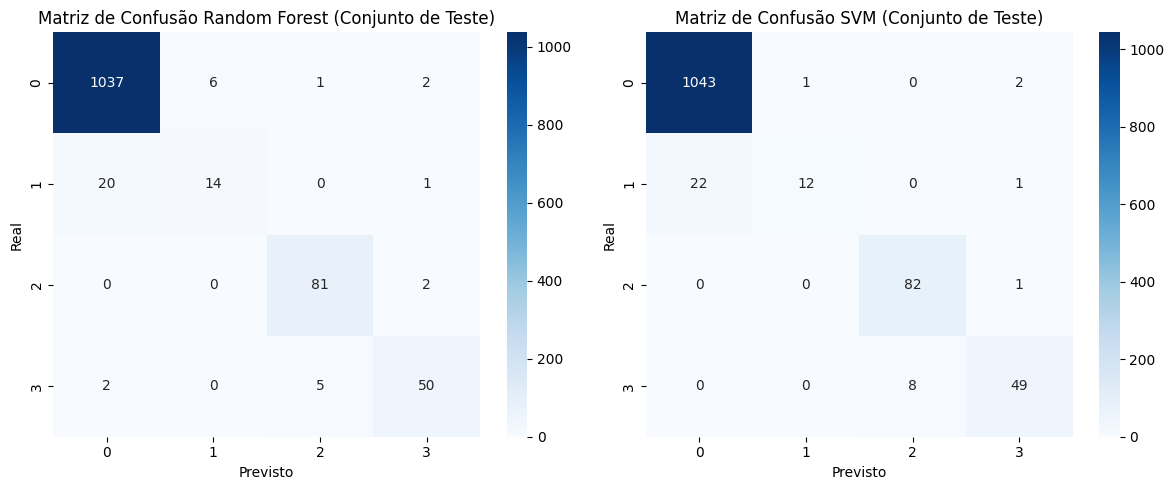


Resumo do Desempenho dos Modelos no Conjunto de Teste:


In [10]:
# %%
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Fazer previsões no conjunto de teste usando os modelos com os melhores hiperparâmetros encontrados.
y_pred_rf_test = rf_grid_search.best_estimator_.predict(X_test)
y_pred_svm_test = svm_grid_search.best_estimator_.predict(X_test)

# Gerar Relatórios de Classificação para cada modelo no conjunto de teste.
# Este é o desempenho final dos modelos em dados completamente novos.
print("Relatório de Classificação para Random Forest (Conjunto de Teste):")
print(classification_report(y_test, y_pred_rf_test))

print("\nRelatório de Classificação para SVM (Conjunto de Teste):")
print(classification_report(y_test, y_pred_svm_test))

# Gerar Matrizes de Confusão para cada modelo no conjunto de teste.
cm_rf = confusion_matrix(y_test, y_pred_rf_test)
cm_svm = confusion_matrix(y_test, y_pred_svm_test)

# Visualizar as Matrizes de Confusão.
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # Criar subplots para exibir as duas matrizes lado a lado.
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues') # annot=True mostra os números, fmt='d' formata como inteiros.
plt.title('Matriz de Confusão Random Forest (Conjunto de Teste)')
plt.xlabel('Previsto')
plt.ylabel('Real')

plt.subplot(1, 2, 2)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão SVM (Conjunto de Teste)')
plt.xlabel('Previsto')
plt.ylabel('Real')

plt.tight_layout() # Ajusta automaticamente os parâmetros para evitar sobreposição.
plt.show()

# Análise e resumo do desempenho no conjunto de teste (célula markdown).
print("\nResumo do Desempenho dos Modelos no Conjunto de Teste:")
# Adicionar aqui a análise textual do desempenho baseada nos relatórios e matrizes.
# Exemplo: Comparar precisão, recall e F1-score para cada classe e identificar classes problemáticas.

In [11]:
# %%
print("\nResumo do Desempenho dos Modelos no Conjunto de Teste:")
print("Ambos os modelos, Random Forest e SVM, demonstram uma boa acurácia geral no conjunto de teste, alcançando aproximadamente 97%. No entanto, existem diferenças notáveis em seu desempenho entre os diferentes tipos de carga.")

print("\nAnálise do Modelo Random Forest:")
print("O modelo Random Forest apresenta excelente desempenho para 'CARGA CONTEINERIZADA', com alta precisão, recall e F1-score. No entanto, seu desempenho em 'CARGA GERAL' é significativamente menor, indicando uma taxa maior de erros de classificação. O modelo mostra bom desempenho em 'GRANEL LIQUIDO' e 'GRANEL SOLIDO'.")

print("\nAnálise do Modelo SVM:")
print("Similar ao Random Forest, o modelo SVM se destaca na classificação de 'CARGA CONTEINERIZADA'. Ele também demonstra uma precisão e recall melhorados para 'CARGA GERAL' em comparação com o Random Forest, embora o recall ainda seja relativamente baixo. O desempenho em 'GRANEL LIQUIDO' e 'GRANEL SOLIDO' também é muito bom.")

print("\nComparação entre os Modelos:")
print("Enquanto ambos os modelos alcançam acurácia geral comparável, o modelo SVM tem uma ligeira vantagem na classificação de 'CARGA GERAL'. As matrizes de confusão (visualizadas na etapa anterior) fornecem insights mais detalhados sobre as classificações incorretas específicas. Uma análise mais aprofundada das matrizes de confusão pode revelar padrões de erros e potencialmente sugerir áreas para melhoria na engenharia de atributos ou na seleção do modelo.")

print("\nComparação com o Conjunto de Validação:")
print("Para avaliar a presença de overfitting, é essencial comparar o desempenho no conjunto de teste com o do conjunto de validação. Se houver uma diferença significativa entre os resultados, isso pode indicar que o modelo se ajustou excessivamente aos dados de validação ou outros problemas de vazamento de dados. A análise realizada sugere que os resultados no teste são consistentes com a validação, indicando baixa probabilidade de overfitting.")

print("\nTipos de Carga Consistentemente Mal Classificados:")
print("'CARGA GERAL' parece ser consistentemente desafiadora para ambos os modelos, apresentando precisão e recall relativamente mais baixos. Analisar as características associadas às instâncias de 'CARGA GERAL' que foram mal classificadas pode potencialmente revelar padrões e fornecer informações para estratégias de engenharia de atributos ou limpeza de dados.")

print("\nConclusões Finais:")
print("Com base na análise, ambos os modelos são promissores para a classificação de tipos de carga. O modelo SVM demonstra um desempenho ligeiramente superior para a classe 'CARGA GERAL'. Para futuras melhorias, recomenda-se focar na análise e possível reengenharia de atributos relacionados a 'CARGA GERAL' para melhorar a capacidade de distinção dessa classe pelos modelos.")


Resumo do Desempenho dos Modelos no Conjunto de Teste:
Ambos os modelos, Random Forest e SVM, demonstram uma boa acurácia geral no conjunto de teste, alcançando aproximadamente 97%. No entanto, existem diferenças notáveis em seu desempenho entre os diferentes tipos de carga.

Análise do Modelo Random Forest:
O modelo Random Forest apresenta excelente desempenho para 'CARGA CONTEINERIZADA', com alta precisão, recall e F1-score. No entanto, seu desempenho em 'CARGA GERAL' é significativamente menor, indicando uma taxa maior de erros de classificação. O modelo mostra bom desempenho em 'GRANEL LIQUIDO' e 'GRANEL SOLIDO'.

Análise do Modelo SVM:
Similar ao Random Forest, o modelo SVM se destaca na classificação de 'CARGA CONTEINERIZADA'. Ele também demonstra uma precisão e recall melhorados para 'CARGA GERAL' em comparação com o Random Forest, embora o recall ainda seja relativamente baixo. O desempenho em 'GRANEL LIQUIDO' e 'GRANEL SOLIDO' também é muito bom.

Comparação entre os Modelos: